In [ ]:
%pwd
%cd ../..

In [ ]:
import time
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)

In [ ]:
problem_names = [
    # 'ackley',
    # 'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    # 'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    # 'schwefel',
    # 'shubert',
    # 'sine_envelope',
    'ackley_30d',
    'ex8_6_2',
]

In [ ]:
problem_performance_list = []
trials = 1

for problem_name in problem_names:
    print(problem_name)
    # Setup the problem
    problem = PROBLEMS_BY_NAME[problem_name]

    # Get the known minimum
    minimum_value = problem['global_minimum']

    # First run IPOPT
    outputs_ipopt = run_ipopt(problem, trials=trials)

    # # Get the final results for all IPOPT runs
    # ipopt_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # ipopt_results['problem_name'] = problem_name
    # ipopt_results['hits'] = np.where(
    #     np.abs(ipopt_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add IPOPT to the problem_performance_list
    # problem_performance_list.append(ipopt_results)

    # Next add dual annealing
    outputs_dual_annealing = run_dual_annealing(problem, trials=trials)

    # # Get the final results for all dual annealing runs
    # dual_annleaing_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # dual_annleaing_results['problem_name'] = problem_name
    # dual_annleaing_results['hits'] = np.where(
    #     np.abs(dual_annleaing_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add dual annealing to the problem_performance_list
    # problem_performance_list.append(dual_annleaing_results)

    # Next add differential evolution
    outputs_differential_evolution = run_differential_evolution(problem, trials=trials)

    # # Get the final results for all differential evolution runs
    # differential_evolution_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # differential_evolution_results['problem_name'] = problem_name
    # differential_evolution_results['hits'] = np.where(
    #     np.abs(differential_evolution_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add differential evolution to the problem_performance_list
    # problem_performance_list.append(differential_evolution_results)

    # Next add pygranso
    outputs = run_pygranso(problem, trials=trials)

    # # Get the final results for all differential evolution runs
    # pygranso_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # pygranso_results['problem_name'] = problem_name
    # pygranso_results['hits'] = np.where(
    #     np.abs(pygranso_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add differential evolution to the problem_performance_list
    # problem_performance_list.append(pygranso_results)

    # Finally, add deeplifting
    outputs = run_deeplifting(
        problem,
        hidden_sizes=(128, 128),
        output_activation='leaky_relu',
        problem_name=problem_name,
        trials=trials,
    )

    # # Get the final results for all differential evolution runs
    # deeplifting_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # deeplifting_results['problem_name'] = problem_name
    # deeplifting_results['hits'] = np.where(
    #     np.abs(deeplifting_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add differential evolution to the problem_performance_list
    # problem_performance_list.append(deeplifting_results)

In [ ]:
# results_df = pd.concat(problem_performance_list, ignore_index=True)

In [ ]:
# performance_df = (
#     results_df
#     .groupby(['problem_name', 'algorithm'])
#     .agg({'hits': 'mean', 'time': 'sum'})
#     .reset_index()
#     .rename(columns={'hits': 'Success Rate', 'time': 'Total Run Time'})
# )

In [ ]:
# performance_df

In [ ]:
outputs['results'][1][:20, :]

In [ ]:
# performance_df = (
#     performance_df
#     .pivot_table(
#         index='problem_name',
#         columns='algorithm',
#         values=['Success Rate', 'Total Run Time']
#     )
#     .T
#     .reorder_levels(['algorithm', None])
#     .sort_index()
#     .T
# )

In [ ]:
# performance_df = performance_df.apply(lambda x: np.round(x, 3))

In [ ]:
# performance_df.to_csv('/Users/ryandevera/Desktop/deeplifting_results.csv')

In [ ]:
# performance_df

In [ ]:
outputs_ipopt

In [ ]:
index = 1
ipopt_outputs = outputs_ipopt['results'][index, :, :]

In [ ]:
ipopt_outputs = ipopt_outputs[~np.isnan(ipopt_outputs).any(axis=1)]

In [ ]:
midpoint = len(ipopt_outputs) // 2
ipopt_outputs = ipopt_outputs[[0, midpoint, -1], :2]

In [ ]:
ipopt_outputs = ipopt_outputs.tolist()

In [ ]:
ipopt_outputs

In [ ]:
dual_annealing_outputs = outputs_dual_annealing['callbacks'][index].x_history
differential_evolution_outputs = outputs_differential_evolution['callbacks'][
    index
].x_history

In [ ]:
trajectories = [
    ipopt_outputs,
    dual_annealing_outputs,
    differential_evolution_outputs,
]

models = ['IPOPT', 'Dual Annealing', 'Differential Evolution']

In [ ]:
from deeplifting.utils import create_contour_plot

In [ ]:
fig = create_contour_plot(
    problem_name=problem_name,
    problem=problem,
    models=models,
    trajectories=trajectories,
    colormap='OrRd_r',
)

In [ ]:
from cyipopt import minimize_ipopt

In [ ]:
?minimize_ipopt

In [ ]:
import numpy as np
import torch

problem = PROBLEMS_BY_NAME['layeb3']

In [ ]:
results = np.zeros((1, 1, 3))
trial = 0
objective = problem['objective']

In [ ]:
objective(np.array([2 * np.pi, 2 * np.pi]), results=results, trial=trial)

In [ ]:
objective(
    torch.tensor([3 * torch.pi, 3 * torch.pi]),
    results=results,
    trial=trial,
    version='pytorch',
)

In [ ]:
problem

In [ ]:
x1, x2 = -2 * np.pi, -2 * np.pi
component1 = np.sin(x1)
component2 = np.exp(np.abs(100.0 - (x1**2 + x2**2) ** 0.5 / np.pi))
component3 = np.sin(x2)
np.abs(component1 * component2 + component3 + 1) ** -0.1

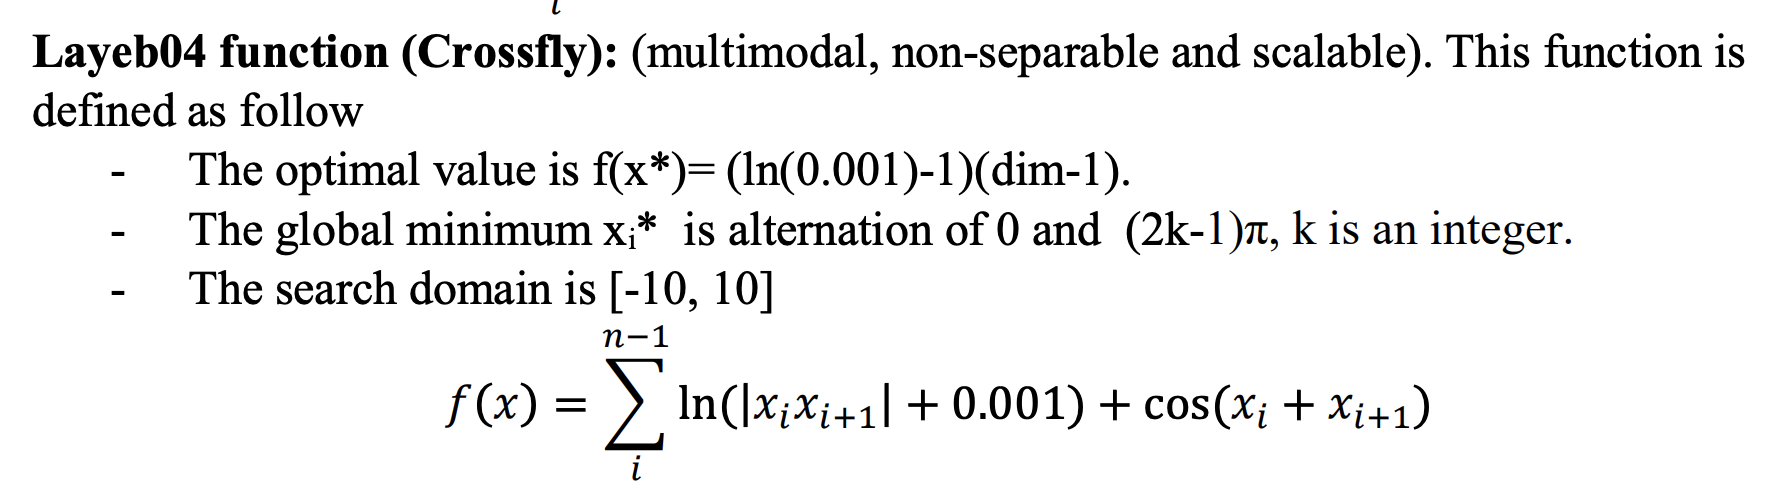

In [ ]:
np.exp(1)

In [ ]:
np.log(1e-3) - 1